# Tutorial for calculating the climate security index

This example shows how to compute the CSI for the example of Kenya at the national level.

## Import libraries

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import os

## Import the CSI functions

In [47]:
from csi_functions import *
home =  os.getcwd()
os.chdir(home)

## Load the example dataset (national-level for Kenya)

In [48]:
# load indicators time series
df = pd.read_csv('code/example_data/final_KEN_national_normed_imputed.csv')

# load network od conditional dependencies
dfe = pd.read_csv('code/example_data/network_KEN_national.csv')

## Prepare the inputs for the CSI functions

In [49]:
# network data
nodes_list = np.array(list(zip(df.index.values, df.Dimension.values))).astype('object')
nodes_list[:,0] = nodes_list[:,0].astype(int)
edges_list = dfe.values

# time series
colYears = np.array([c for c in df.columns if c.isnumeric()])
X = df[colYears].values

# extreme events (at the moment it is simulated)
x = np.abs(st.gennorm.rvs(1, size=100))
percentile = 75
n_resamples = 10000

## Compute the CSI components

In [50]:
# compute connectivity component
Q, E = get_connectivity(nodes_list, edges_list)

# compute synchronization component
PLV, S = get_synchronization(X)

# compute the extreme events component
ME = get_heavy_tailness(x, percentile, n_resamples)

## Make a radar plot of the CSI

The interpretation of the CSI is that, the closer to the origin it is, the less climate security risk there is. Thus, countries that systematically cross over to the outer area should consider climate security risks.

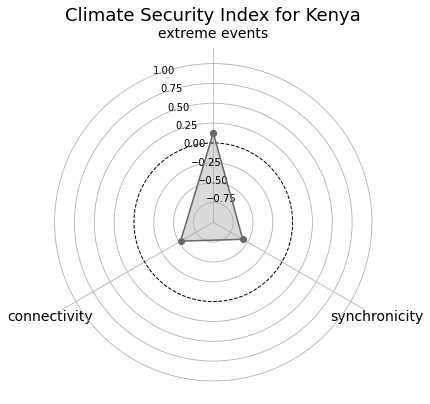

In [51]:
categories = ['extreme events', 'connectivity', 'synchronicity']
values = [ME, Q, PLV]
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
ax.set_theta_offset(np.pi / 2)
ax.fill(angles, values+[values[0]], color='#696969', alpha=0.25)
ax.plot(angles, values+[values[0]], color='#696969', marker='o')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=14)
plt.ylim(-1., 1.2)
gridlines = ax.yaxis.get_gridlines()
ax.yaxis.grid(True)
gridlines[3].set_linewidth(1)
gridlines[3].set_color('black')
gridlines[3].set_linestyle('--')
ax.spines['polar'].set_visible(False)
plt.title('Climate Security Index for Kenya', fontsize=18)
plt.tight_layout()
plt.show()